In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import numpy as np
import logging

# Set the directory containing images
image_dir = './Skin_Deisease_acne'


## Load and Explore the Data

In [2]:
# Set up logging
logging.basicConfig(filename='processing_log.txt', level=logging.INFO,format='%(asctime)s - %(levelname)s - %(message)s')

# List to store image data
data = []

# Initialize a counter for processed images
processed_images = 0

# Load image names and labels
for filename in os.listdir(image_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        label = filename.split('.')[0]
        img_path = os.path.join(image_dir, filename)
        img = Image.open(img_path)
        width, height = img.size
        data.append({'filename': filename, 'label': label, 'width': width, 'height': height})

# Create DataFrame
df = pd.DataFrame(data)

# Write DataFrame to a CSV file
output_file = 'skin_condition_labels.csv'
df.to_csv(output_file, index=False)

# Log the total number of processed images
logging.info(f"Total number of processed images: {processed_images}")

print(f"Data has been written to {output_file}")
print(f"Log file has been created as processing_log.txt")


Data has been written to skin_condition_labels.csv
Log file has been created as processing_log.txt


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399 entries, 0 to 1398
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  1399 non-null   object
 1   label     1399 non-null   object
 2   width     1399 non-null   int64 
 3   height    1399 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 43.8+ KB


In [4]:
df['label'].value_counts()

rosacea      356
acne         301
eczema       301
carcinoma    159
keratosis    159
milia        123
Name: label, dtype: int64

## Visualize the Distribution of Classes

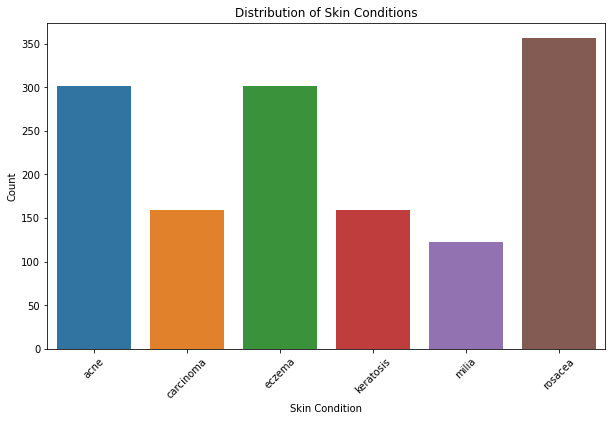

In [5]:
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=df)
plt.title('Distribution of Skin Conditions')
plt.xlabel('Skin Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


## Visualize Sample Images

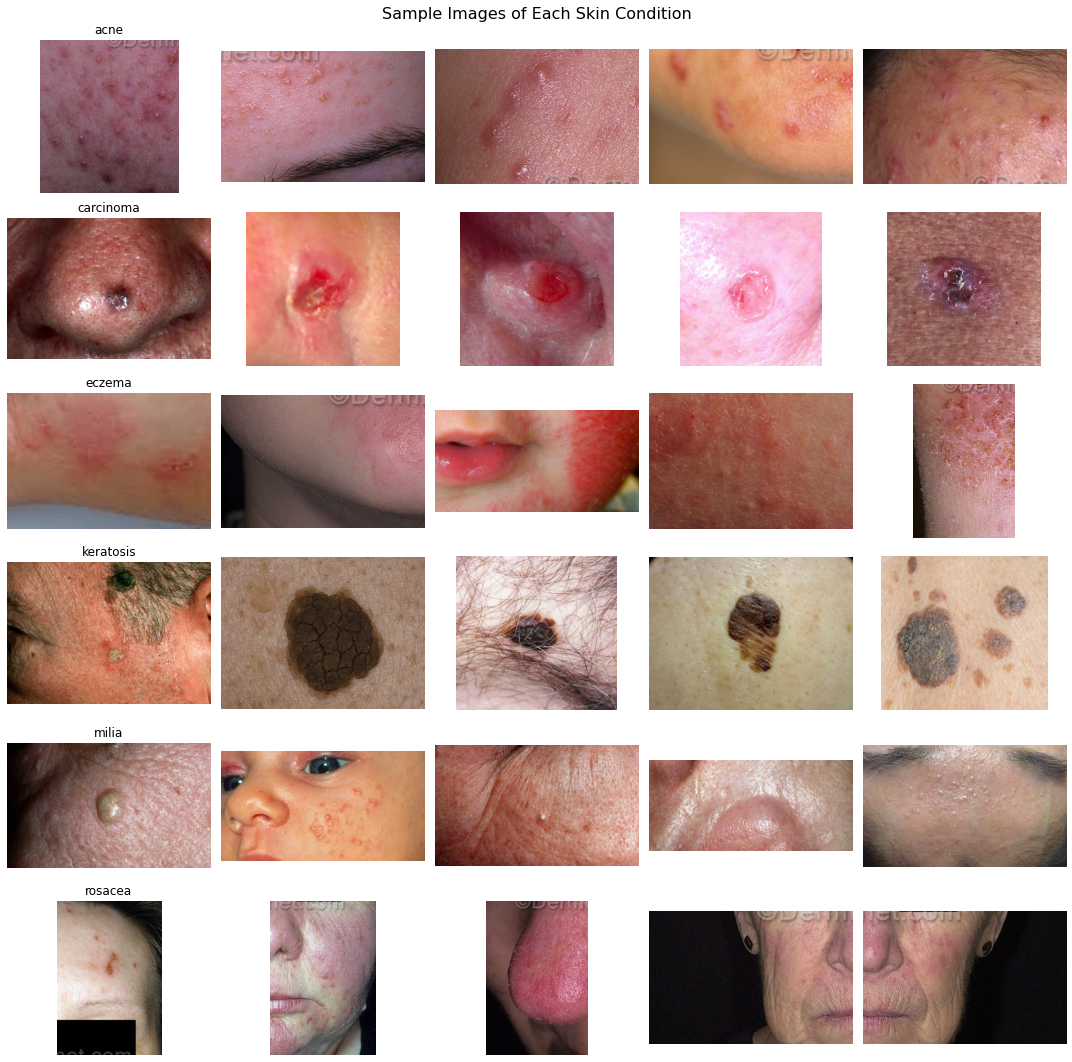

In [6]:
def display_samples(df, image_dir, num_samples=5):
    unique_labels = df['label'].unique()
    fig, axes = plt.subplots(len(unique_labels), num_samples, figsize=(15, 15))
    fig.suptitle('Sample Images of Each Skin Condition', fontsize=16)

    for i, label in enumerate(unique_labels):
        sample_filenames = df[df['label'] == label]['filename'].sample(num_samples).values
        for j, filename in enumerate(sample_filenames):
            img = Image.open(os.path.join(image_dir, filename))
            axes[i, j].imshow(img)
            axes[i, j].axis('off')
            if j == 0:
                axes[i, j].set_title(label, fontsize=12)

    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()

display_samples(df, image_dir)


## Image Size Analysis

             width       height
count  1399.000000  1399.000000
mean    517.599714   410.120801
std     439.142973   316.209310
min      93.000000    74.000000
25%     243.000000   236.000000
50%     360.000000   329.000000
75%     536.500000   400.000000
max    3504.000000  2661.000000


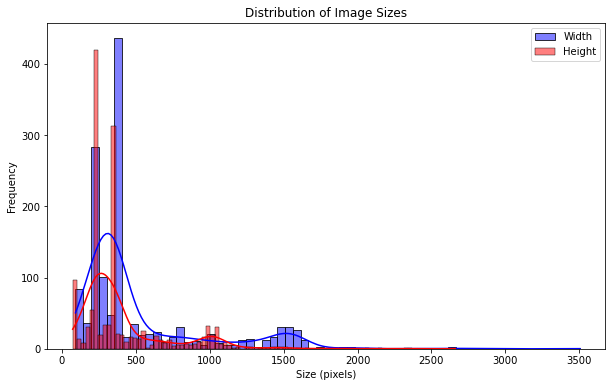

In [7]:
image_sizes = []

for filename in df['filename']:
    img = Image.open(os.path.join(image_dir, filename))
    image_sizes.append(img.size)

df['image_size'] = image_sizes

# Create a DataFrame for image size analysis
size_df = pd.DataFrame(image_sizes, columns=['width', 'height'])

# Summary statistics
print(size_df.describe())

# Plot the distribution of image sizes
plt.figure(figsize=(10, 6))
sns.histplot(size_df['width'], kde=True, color='blue', label='Width')
sns.histplot(size_df['height'], kde=True, color='red', label='Height')
plt.title('Distribution of Image Sizes')
plt.xlabel('Size (pixels)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


## Check for Correlations in Image Sizes

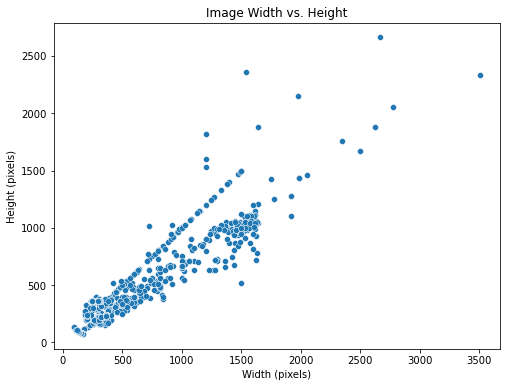

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='width', y='height', data=size_df)
plt.title('Image Width vs. Height')
plt.xlabel('Width (pixels)')
plt.ylabel('Height (pixels)')
plt.show()


## Calculate Average Image Size for Each Class

In [9]:
avg_size_per_class = df.groupby('label')['image_size'].apply(lambda x: np.mean(x.tolist(), axis=0))
print(avg_size_per_class)


label
acne          [409.0299003322259, 296.0764119601329]
carcinoma      [995.5471698113207, 803.377358490566]
eczema       [319.6079734219269, 243.90365448504983]
keratosis     [910.2075471698113, 668.4654088050314]
milia         [793.5528455284552, 528.2032520325204]
rosacea      [292.64044943820227, 315.2612359550562]
Name: image_size, dtype: object


## Resize Images Keeping Aspect Ratio

In [11]:
# Load your dataset
df = pd.read_csv('./skin_condition_labels.csv')  # Replace with your CSV file

# Define the target size (e.g., 256x256)
target_size = (256, 256)

# Function to resize an image and add padding if necessary
def resize_and_pad_image(image_path, output_path, target_size):
    with Image.open(image_path) as img:
        # Resize image keeping the aspect ratio
        img.thumbnail(target_size, Image.ANTIALIAS)
        
        # Create a new image with the target size and a white background
        new_img = Image.new("RGB", target_size, (255, 255, 255))
        
        # Calculate position to paste the resized image
        left = (target_size[0] - img.width) // 2
        top = (target_size[1] - img.height) // 2
        
        # Paste the resized image onto the new image
        new_img.paste(img, (left, top))
        new_img.save(output_path)

# Output directory for resized images
output_dir = 'Resized_Images'
os.makedirs(output_dir, exist_ok=True)

# Process each image
for _, row in df.iterrows():
    image_path = os.path.join(image_dir, row['filename'])
    output_path = os.path.join(output_dir, row['filename'])
    resize_and_pad_image(image_path, output_path, target_size)

print("Image resizing and padding completed.")



Image resizing and padding completed.
